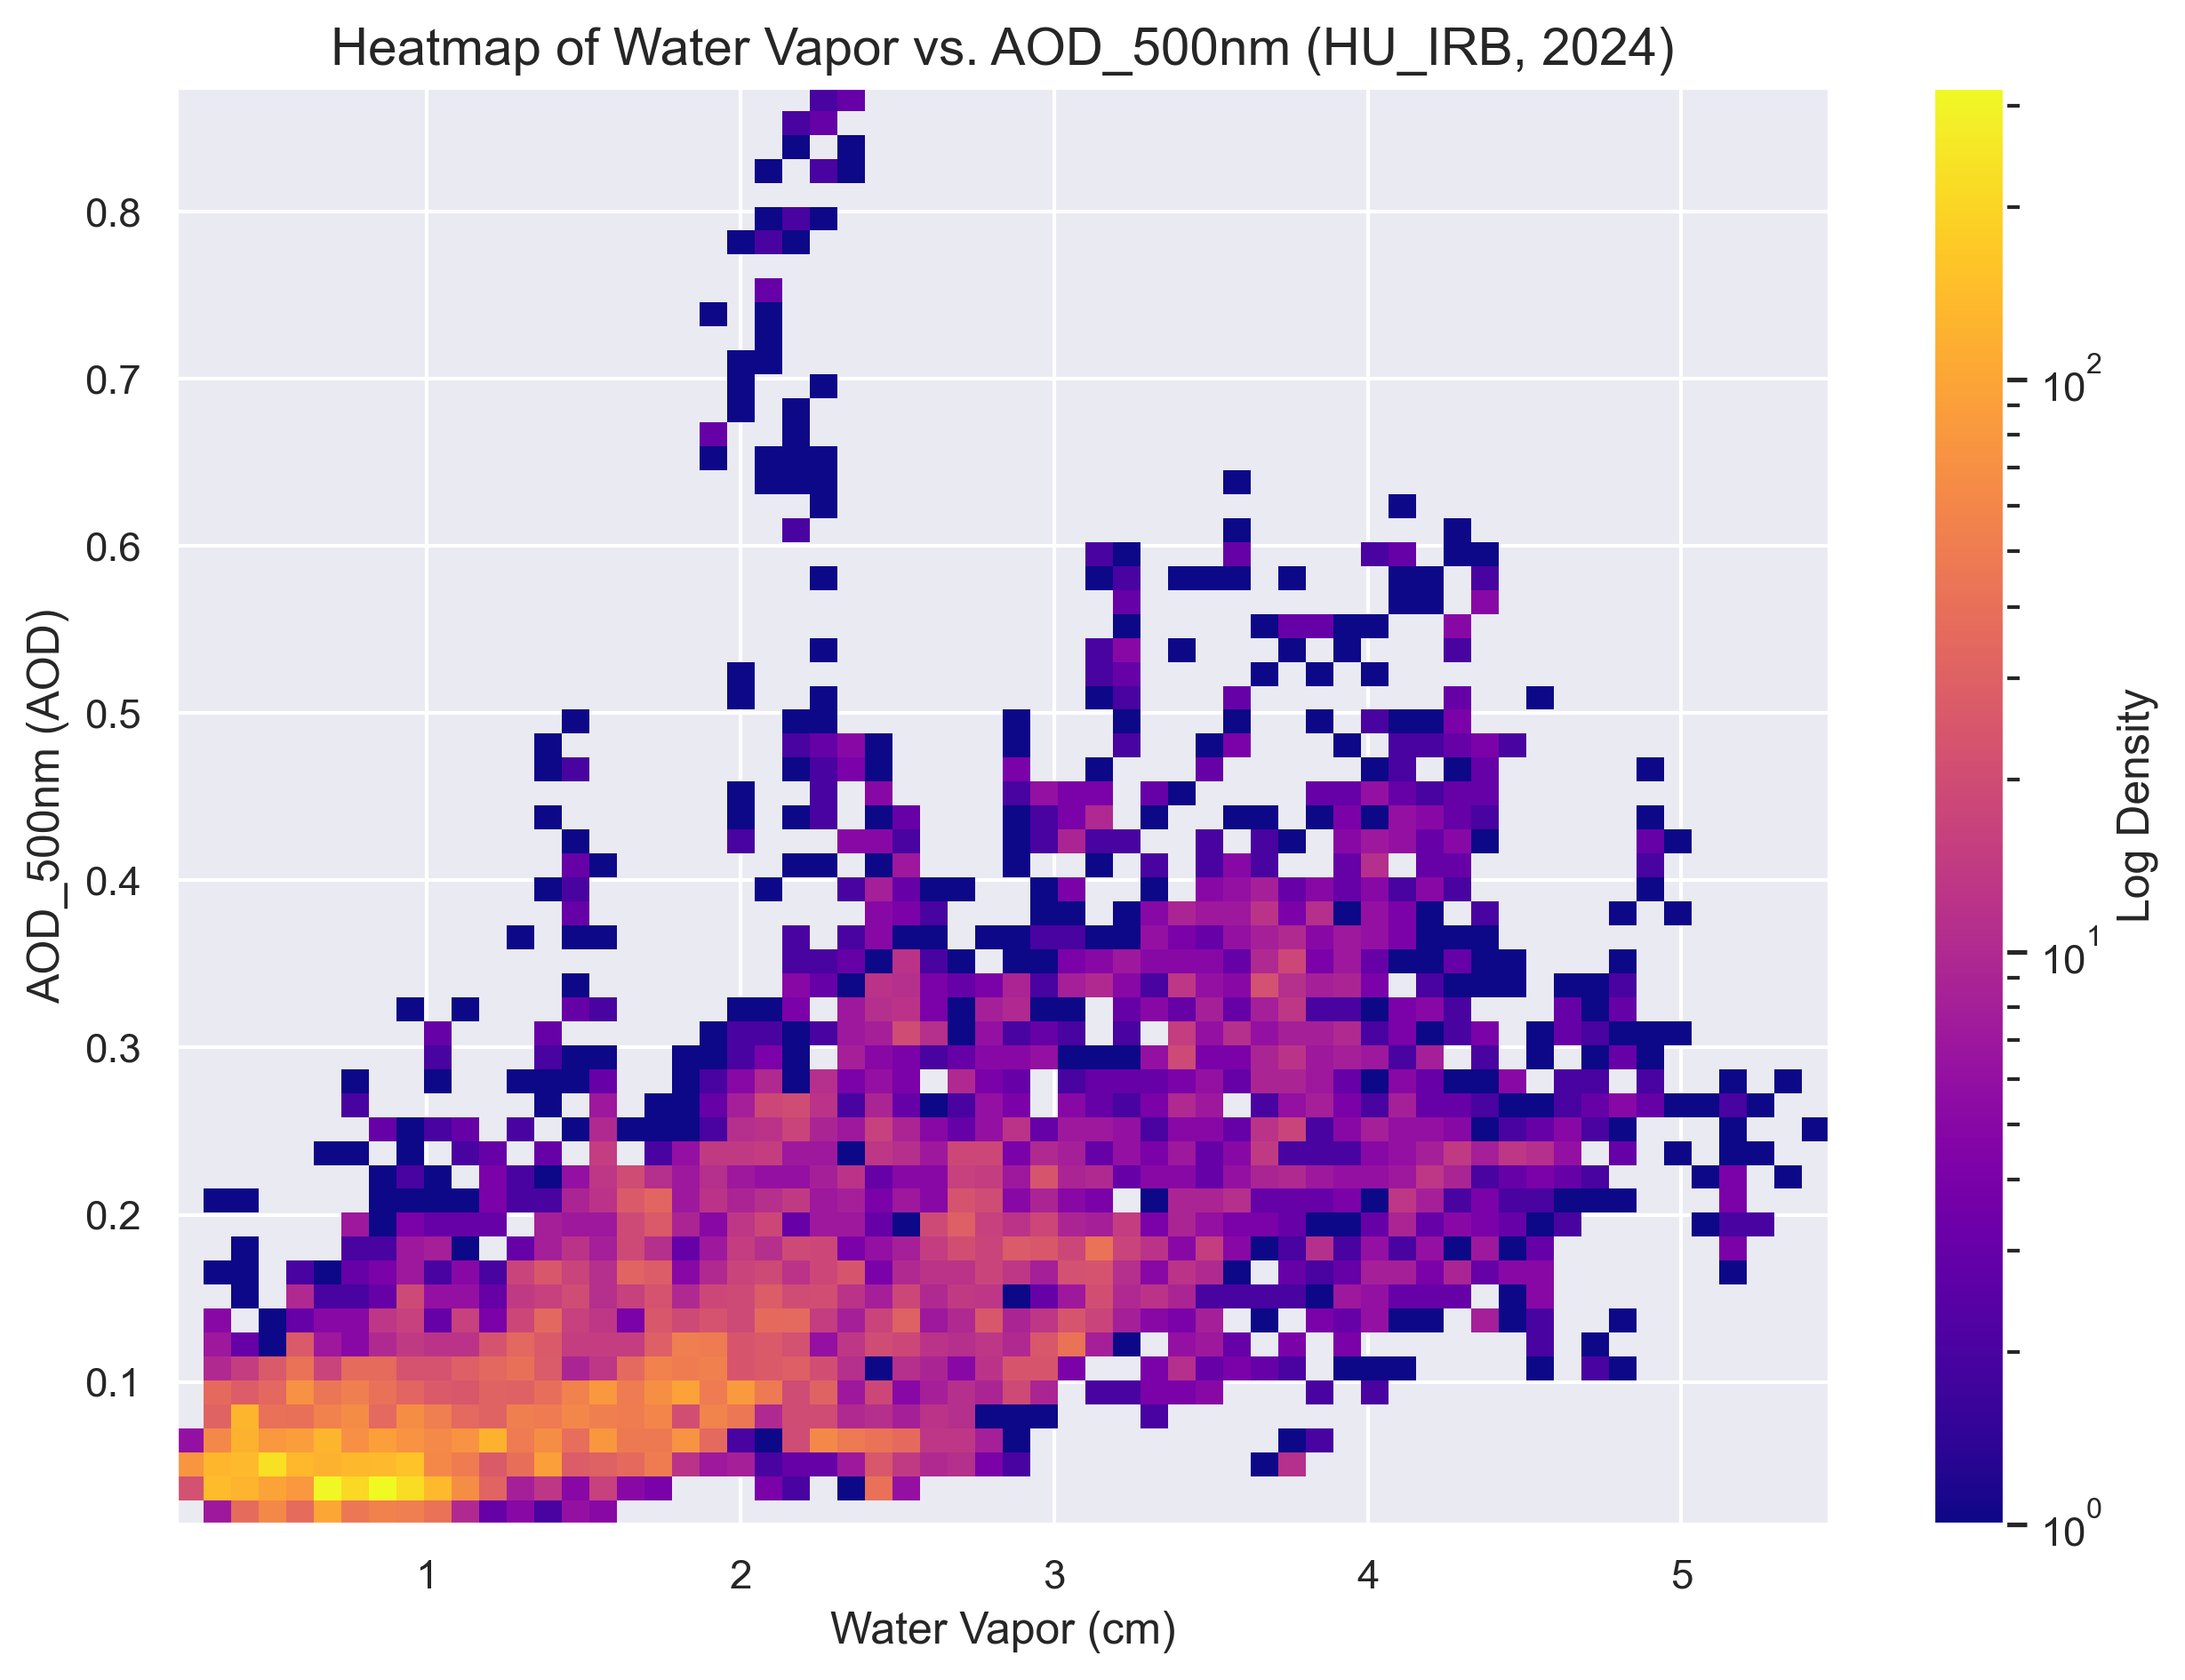

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_heatmap_wv_vs_aod(site, year, aod_wavelength="AOD_500nm", bins=(60, 60)):
    """
    Plots a heatmap showing the density of Water Vapor vs. AOD.

    Parameters:
        site (str): The site name (e.g., "HU_IRB", "GSFC", "SERC").
        year (int): The year of the data.
        aod_wavelength (str): The AOD wavelength column to plot (e.g., "AOD_500nm").
        bins (tuple): Number of bins for the 2D histogram (default is 60x60 for better visibility).
    """
    # Define file path
    data_folder = rf"C:\Users\Sandy\Documents\Aeronet\Data\{site}\Processed"
    file_name = f"{site}_processed_{year}_AOD15_directsun.csv"
    file_path = os.path.join(data_folder, file_name)

    # Read the cleaned data
    df = pd.read_csv(file_path, parse_dates=['DateTime'])

    # Drop NaN values before plotting
    df_clean = df.dropna(subset=["Precipitable_Water(cm)", aod_wavelength]).copy()

    # Create 2D histogram
    x = df_clean["Precipitable_Water(cm)"]
    y = df_clean[aod_wavelength]

    # Plot heatmap
    fig, ax = plt.subplots(figsize=(10, 7))
    hb = ax.hist2d(x, y, bins=bins, cmap="plasma", norm=plt.matplotlib.colors.LogNorm())  # APPLY LOG SCALE

    # Add colorbar
    cbar = plt.colorbar(hb[3], ax=ax)
    cbar.set_label("Log Density")

    # Formatting
    ax.set_title(f"Heatmap of Water Vapor vs. {aod_wavelength} ({site}, {year})", fontsize=14)
    ax.set_xlabel("Water Vapor (cm)", fontsize=12)
    ax.set_ylabel(f"{aod_wavelength} (AOD)", fontsize=12)

    plt.show()

# Example usage
plot_heatmap_wv_vs_aod("HU_IRB", 2024, aod_wavelength="AOD_500nm")
